In [1]:
import pandas as pd

In [2]:
directory = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-vedernikova/Statistica/dating_data.csv'
df = pd.read_csv(directory)

In [3]:
df.head(3)

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0


Значение выборки - 14 514. 

-  Группа 0 - старый алгоритм
-  Группа 1 - новый алгоритм

In [14]:
users_count = df.groupby(['group']).agg(count=('user_id_1', 'count')).reset_index()
users_count

,group,count
0,0,4792
1,1,9722


Распределение в группах неравномерное.

#### Таблица сопряженности:

In [4]:
contingency_table = pd.crosstab(df['group'], df['is_match'])
contingency_table = contingency_table.reset_index()
contingency_table

is_match,group,0,1
0,0,3858,934
1,1,5813,3909


#### Процентное распределение значений переменных внутри каждой группы:

In [5]:
# Добавление столбцов с процентным распределением значений переменных внутри каждой группы
contingency_table['group_0_percent'] = (contingency_table[0] / contingency_table[0].sum()) * 100
contingency_table['group_1_percent'] = (contingency_table[1] / contingency_table[1].sum()) * 100
contingency_table

is_match,group,0,1,group_0_percent,group_1_percent
0,0,3858,934,39.892462,19.285567
1,1,5813,3909,60.107538,80.714433


В группе 0 39.89% наблюдений имеют значение 0, а 60.11% наблюдений имеют значение 1. В группе 1 19.29% наблюдений имеют значение 0, а 80.71% наблюдений имеют значение 1.

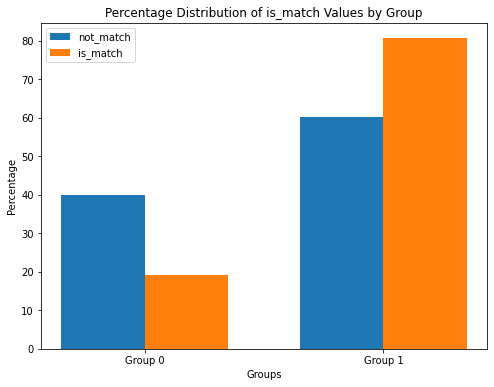

In [8]:
import matplotlib.pyplot as plt

# Данные для построения графика
groups = ['Group 0', 'Group 1']
percent_0 = [39.89, 60.11]  # Процент значений 0 в каждой группе
percent_1 = [19.29, 80.71]  # Процент значений 1 в каждой группе

# Создание столбчатой диаграммы
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(groups))

bar1 = plt.bar(index, percent_0, bar_width, label='not_match')
bar2 = plt.bar([i + bar_width for i in index], percent_1, bar_width, label='is_match')

# Добавление подписей к графику
plt.xlabel('Groups')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of is_match Values by Group')
plt.xticks([i + bar_width/2 for i in index], groups)
plt.legend()

## Тест Хи-квадрат

In [6]:
from scipy.stats import chi2_contingency

# Создание таблицы сопряженности
contingency_table = pd.crosstab(df['group'], df['is_match'])

# Проведение теста хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Хи-квадрат статистика:", chi2)
print("p-значение:", p)
print("Степени свободы:", dof)
print("Ожидаемые частоты:", expected)

Хи-квадрат статистика: 618.6889141576198
p-значение: 1.4418299163662586e-136
Степени свободы: 1
Ожидаемые частоты: [[3193.01584677 1598.98415323]
 [6477.98415323 3244.01584677]]


Полученные результаты теста хи-квадрат указывают на то, что между переменными "group" и "is_match" существует статистически значимая связь.
1. Хи-квадрат статистика: Значение 618.69 указывает на силу связи между переменными. Чем больше значение хи-квадрат, тем сильнее связь между переменными.
2. p-значение: Очень маленькое значение p-значения (1.44e-136) говорит о том, что вероятность получить такие или более экстремальные результаты при условии независимости переменных крайне мала. Мы можем отвергнуть нулевую гипотезу о независимости переменных и сделать вывод о наличии статистически значимой связи между ними.
3. Степени свободы: В данном случае степени свободы равны 1, так как у нас две категориальные переменные.
4. Ожидаемые частоты: Это матрица, которая показывает ожидаемое количество наблюдений в каждой ячейке таблицы сопряженности, если переменные были независимы. Значения в этой матрице сравниваются с фактическими наблюдениями, чтобы определить, насколько они отличаются.

Исходя из полученных результатов, можно сделать вывод о том, что переменные "group" и "is_match" имеют статистически значимую связь. 

#### По результатам теста Хи-квадрат можно сделать вывод, что новый алгоритм работает лучше.

### Bootstrap

In [15]:
import numpy as np

# Функция для генерации бутстрэп-выборок
def bootstrap_mean(data, n_bootstrap):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    return bootstrap_means

# Вычисление среднего значения переменной "is_match" в каждой бутстрэп-выборке
data = df['is_match'].values
n_bootstrap = 1000  # Количество бутстрэп-выборок
bootstrap_means = bootstrap_mean(data, n_bootstrap)

# Построение 95% доверительного интервала
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print("95% доверительный интервал для среднего значения is_match:", confidence_interval)


95% доверительный интервал для среднего значения is_match: [0.32644171 0.34146341]


95% доверительный интервал для среднего значения переменной "is_match" [0.32644171, 0.34146341] означает следующее:
1. **Доверительный интервал**: Этот интервал указывает на диапазон значений, в пределах которого, с вероятностью 95%, находится истинное среднее значение переменной "is_match" в вашей выборке. Другими словами, с вероятностью 95% истинное среднее значение переменной "is_match" будет находиться между 0.32644171 и 0.34146341.
2. **Интерпретация**: Это означает, что если бы вы многократно повторяли процесс сбора выборок и вычисления среднего значения переменной "is_match", то в 95% случаев истинное среднее значение переменной "is_match" будет попадать в указанный доверительный интервал.
3. **Значимость интервала**: Так как доверительный интервал не содержит нулевое значение, это может указывать на статистически значимое различие между группами или наличие эффекта в переменной "is_match".

Итак, в данном случае, 95% доверительный интервал для среднего значения переменной "is_match" указывает на диапазон значений, в котором с высокой вероятностью находится истинное среднее значение этой переменной в вашей выборке.

 ### По результатам двух тестов очевидно, что новый алгоритм работает лучше.